**PREPROCESS**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, LSTM, SimpleRNN

from sklearn.preprocessing import StandardScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df = pd.read_csv("C:/Users/srbol/OneDrive/Desktop/Binus/Semester 4/Deep learning/UAS/Nomor 1/GOOGL.csv", parse_dates=['Date'], index_col=['Date'])
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659000
2004-08-20,50.555557,54.594593,50.300301,54.209209,54.209209,22834300
2004-08-23,55.430431,56.796795,54.579578,54.754753,54.754753,18256100
2004-08-24,55.675674,55.855854,51.836838,52.487488,52.487488,15247300
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188600


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659000
2004-08-20,50.555557,54.594593,50.300301,54.209209,54.209209,22834300
2004-08-23,55.430431,56.796795,54.579578,54.754753,54.754753,18256100
2004-08-24,55.675674,55.855854,51.836838,52.487488,52.487488,15247300
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188600
...,...,...,...,...,...,...
2020-03-26,1114.719971,1171.479980,1092.030029,1162.920044,1162.920044,3828100
2020-03-27,1127.469971,1151.050049,1104.000000,1110.260010,1110.260010,3139700
2020-03-30,1132.640015,1151.000000,1098.489990,1146.310059,1146.310059,2936800


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3932 entries, 2004-08-19 to 2020-04-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3932 non-null   float64
 1   High       3932 non-null   float64
 2   Low        3932 non-null   float64
 3   Close      3932 non-null   float64
 4   Adj Close  3932 non-null   float64
 5   Volume     3932 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 215.0 KB


Since we're using only closing price and the date column, we can drop the others or make a new dataframe contains only date and closing price

In [5]:
df2 = pd.DataFrame(df['Close'])
df2

,Close
Date,
2004-08-19,50.220219
2004-08-20,54.209209
2004-08-23,54.754753
2004-08-24,52.487488
2004-08-25,53.053055
...,...
2020-03-26,1162.920044
2020-03-27,1110.260010
2020-03-30,1146.310059


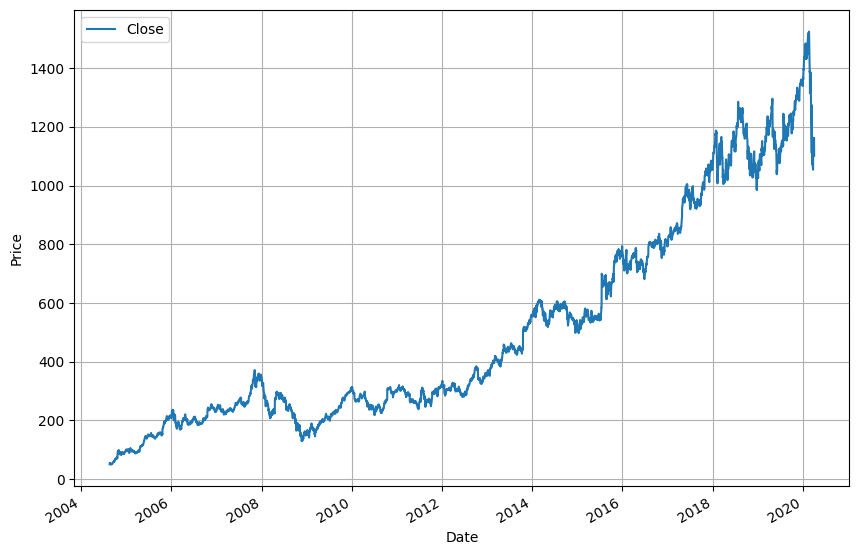

In [6]:
df2.plot(figsize=(10,7))
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3932 entries, 2004-08-19 to 2020-04-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3932 non-null   float64
dtypes: float64(1)
memory usage: 61.4 KB


**DATA SPLIT**

In [8]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the data and transform it
df2 = scaler.fit_transform(df2)

# Convert the result back to a DataFrame
df2 = pd.DataFrame(df2, columns=['Price'])

In [9]:
time_step=df2.index.to_numpy()
price=df2['Price'].values.astype('float32')
time_step[:10],price[:10]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),
 array([1.1199029e-04, 2.8167302e-03, 3.1866366e-03, 1.6493148e-03,
        2.0327982e-03, 2.6809850e-03, 2.0837015e-03, 6.7873142e-04,
        8.0090243e-04, 8.1448183e-05], dtype=float32))

In [10]:
train_size=int(0.8*len(price))
valid_size=int(0.1*len(price))
test_size=int(0.1*len(price))
print(train_size,valid_size,test_size)

3145 393 393


In [11]:
split_size_train = int(0.8 * len(price))
split_size_val = int(0.1 * len(price))

train_time, train_price = time_step[:split_size_train], price[:split_size_train]
val_time, val_price = time_step[split_size_train:split_size_train + split_size_val], price[split_size_train:split_size_train + split_size_val]
test_time, test_price = time_step[split_size_train + split_size_val:], price[split_size_train + split_size_val:]
len(train_time),len(test_time),len(train_price),len(test_price)

(3145, 394, 3145, 394)

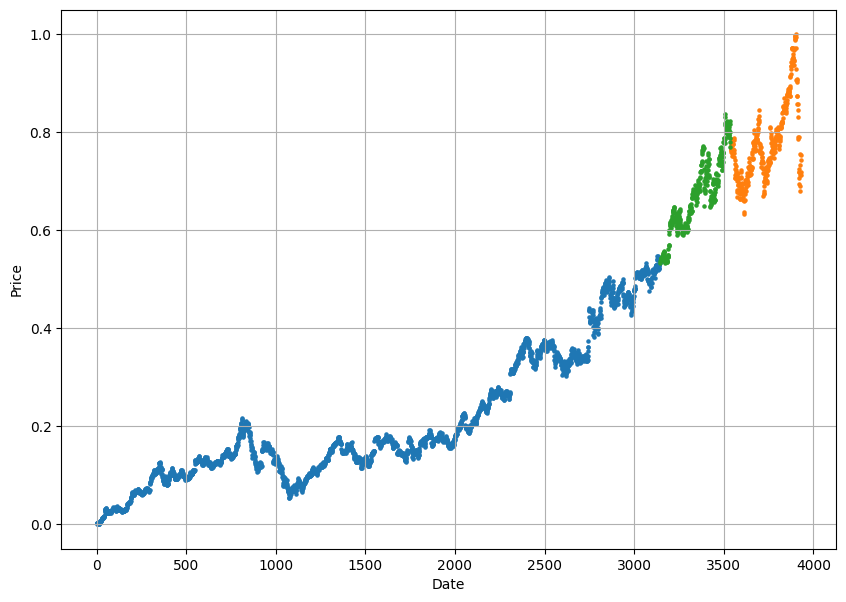

In [22]:
plt.figure(figsize=(10,7))
plt.scatter(train_time, train_price, s=5, label="Train data")
plt.scatter(test_time, test_price, s=5, label="Test data")
plt.scatter(val_time, val_price, s=5, label="val data")
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [13]:
import torch
def create_dataset(dataset, step):
    X, y = [], []
    for i in range(len(dataset)-step):
        feature = dataset[i:i+step]
        target = dataset[i+step:i+step+1]
        X.append(feature)
        y.append(target)
    return torch.tensor(X), torch.tensor(y)

c:\Users\srbol\anaconda3\envs\deep_learning\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
step = 5
X_train, y_train = create_dataset(train_price, step=step)
X_val, y_val = create_dataset(val_price, step=step)
X_test, y_test = create_dataset(test_price, step=step)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

torch.Size([3140, 5]) torch.Size([3140, 1])
torch.Size([389, 5]) torch.Size([389, 1])


C:\Users\srbol\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:233.)
  if __name__ == "__main__":


For my 2nd model, i decrease LSTM layers into 5. I'd tried 48, 52, 30, and they all overfit. So tried to immediately reduce the number of layers significantly.
Also i change the Adam optimizer into RMSprop

RMSprop is favored for tasks like stock price prediction using LSTM due to its adaptive learning rate mechanism, effective handling of sparse gradients, and overall robust performance in neural network training. However, as with any optimizer choice, it's beneficial to experiment with different options and tune hyperparameters based on the specific characteristics of your dataset and model architecture.





In [15]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from keras.regularizers import l2

model = Sequential()
model.add(LSTM(units=5, activation='relu', input_shape=(5, 1))) 
model.add(Dense(units=1))
optimizer = RMSprop(learning_rate = 0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

Tried dropout before, but it made the model even worse

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5)                 140       
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError, MeanAbsolutePercentageError
from tensorflow.keras.callbacks import Callback

X_train = np.array(X_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
X_val = np.array(X_val, dtype=np.float32)
y_val = np.array(y_val, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(buffer_size=len(X_train)).batch(8)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(8)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(8)


class MetricsCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 20 == 0:
            y_pred_train = self.model.predict(X_train)
            y_pred_val = self.model.predict(X_val)
            y_pred_test = self.model.predict(X_test)

            train_rmse = np.sqrt(MeanSquaredError()(y_train, y_pred_train).numpy())
            val_rmse = np.sqrt(MeanSquaredError()(y_val, y_pred_val).numpy())
            test_rmse = np.sqrt(MeanSquaredError()(y_test, y_pred_test).numpy())

            train_mae = MeanAbsoluteError()(y_train, y_pred_train).numpy()
            val_mae = MeanAbsoluteError()(y_val, y_pred_val).numpy()
            test_mae = MeanAbsoluteError()(y_test, y_pred_test).numpy()

            train_mape = MeanAbsolutePercentageError()(y_train, y_pred_train).numpy()
            val_mape = MeanAbsolutePercentageError()(y_val, y_pred_val).numpy()
            test_mape = MeanAbsolutePercentageError()(y_test, y_pred_test).numpy()

            print(f"Epoch {epoch}: train RMSE {train_rmse:.4f}, val RMSE {val_rmse:.4f}, test RMSE {test_rmse:.4f}")
            print(f"Epoch {epoch}: train MAE {train_mae:.4f}, val MAE {val_mae:.4f}, test MAE {test_mae:.4f}")
            print(f"Epoch {epoch}: train MAPE {train_mape:.4f}, val MAPE {val_mape:.4f}, test MAPE {test_mape:.4f}")

# Melatih model
n_epochs = 50
history = model.fit(train_dataset, validation_data=val_dataset, epochs=n_epochs, callbacks=[MetricsCallback()])




Epoch 1/50
393/393 [==============================] - ETA: 0s - loss: 0.0020Epoch 0: train RMSE 0.0084, val RMSE 0.0380, test RMSE 0.0726
Epoch 0: train MAE 0.0066, val MAE 0.0301, test MAE 0.0638
Epoch 0: train MAPE 3448.3958, val MAPE 4.3119, test MAPE 7.9778
393/393 [==============================] - 8s 15ms/step - loss: 0.0020 - val_loss: 0.0014
Epoch 2/50
393/393 [==============================] - 6s 14ms/step - loss: 5.4869e-05 - val_loss: 6.1748e-04
Epoch 3/50
393/393 [==============================] - 5s 14ms/step - loss: 4.9760e-05 - val_loss: 8.1391e-04
Epoch 4/50
393/393 [==============================] - 5s 14ms/step - loss: 4.8226e-05 - val_loss: 8.2784e-04
Epoch 5/50
393/393 [==============================] - 5s 14ms/step - loss: 4.9297e-05 - val_loss: 6.0299e-04
Epoch 6/50
393/393 [==============================] - 5s 13ms/step - loss: 4.8244e-05 - val_loss: 2.3632e-04
Epoch 7/50
393/393 [==============================] - 5s 14ms/step - loss: 4.7048e-05 - val_loss: 5.800

In [18]:
y_pred_test = model.predict(X_test)

y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_test_unscaled = scaler.inverse_transform(y_pred_test.reshape(-1, 1)).flatten()


test_rmse = np.sqrt(MeanSquaredError()(y_test_unscaled, y_pred_test_unscaled).numpy())
test_mae = MeanAbsoluteError()(y_test_unscaled, y_pred_test_unscaled).numpy()
test_mape = MeanAbsolutePercentageError()(y_test_unscaled, y_pred_test_unscaled).numpy()

print(f"Final test RMSE: {test_rmse:.4f}")
print(f"Final test MAE: {test_mae:.4f}")
print(f"Final test MAPE: {test_mape:.4f}")

Final test RMSE: 24.0297
Final test MAE: 16.7106
Final test MAPE: 1.4166


Tried to regularized the data but didn't perform better than the base pipeline, so i tried once more with simpler model 
Final test RMSE: 69.1615
Final test MAE: 61.0125
Final test MAPE: 4.9629

Also tried to change the optimizer function using RMSprop, but still can't get a better performance than the baseline

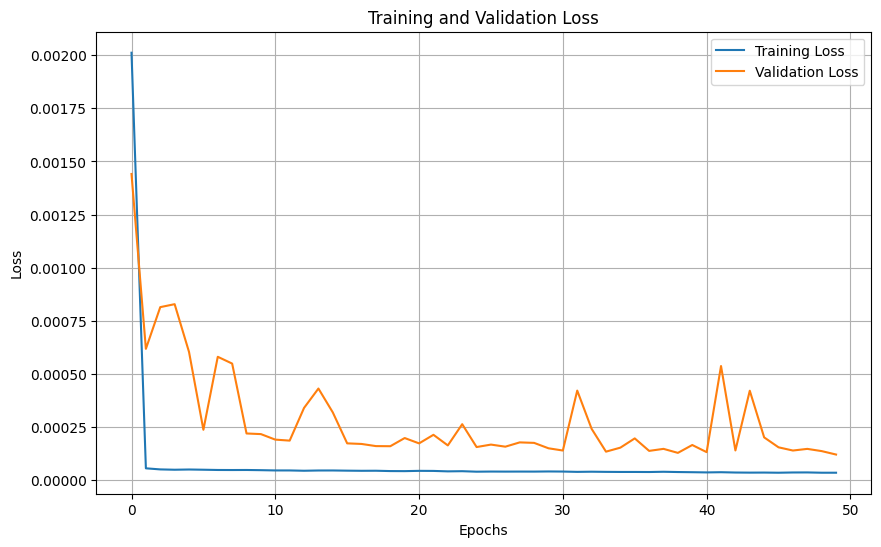

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

The model is still overfitting but this time is slightly better than the first model      

     Test Pred    Actual
0     0.765986  0.764791
1     0.765103  0.752484
2     0.757514  0.757420
3     0.757289  0.762275
4     0.759806  0.774006
..         ...       ...
384   0.712595  0.754579
385   0.737205  0.718873
386   0.727090  0.743317
387   0.736754  0.753922
388   0.746668  0.713340

[389 rows x 2 columns]


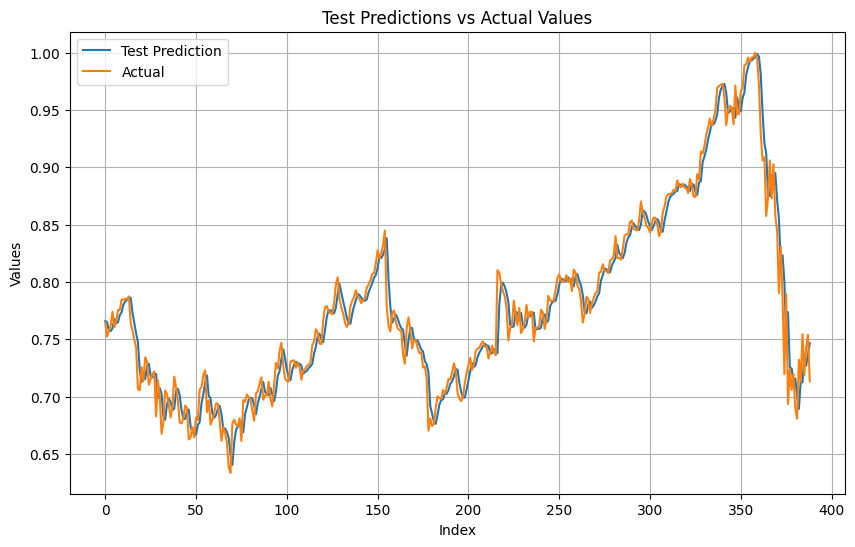

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


y_pred = model.predict(X_test)
y_pred = y_pred.flatten()
y_test = y_test.flatten()

test_res = pd.DataFrame(data={'Test Pred': y_pred, 'Actual': y_test})

print(test_res)

plt.figure(figsize=(10, 6))
plt.plot(test_res['Test Pred'], label='Test Prediction')
plt.plot(test_res['Actual'], label='Actual')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Test Predictions vs Actual Values')
plt.legend()
plt.grid(True)
plt.show()
